# Dự đoán bệnh tim


### Import thư viện và load file csv

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split


In [3]:
data = pd.read_csv('heart.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


## Chú thích
1. age: tuổi
2. sex: giới tính (1 = nam; 0 = nữ)
3. cp - kiểu đau ngực - tức ngực
    * 0: Đau thắt ngực điển hình: đau ngực liên quan đến giảm cung cấp máu cho tim
    * 1: Đau thắt ngực không điển hình: đau ngực không liên quan đến tim
    * 2: Đau không đau thắt ngực: điển hình là co thắt thực quản (không liên quan đến tim)
    * 3: Không có triệu chứng: đau ngực không có dấu hiệu của bệnh
4. trrestbps - huyết áp lúc nghỉ (tính bằng mm Hg khi nhập viện)
    * trên 130-140 thường gây lo ngại
5. chol - cholestoral huyết thanh tính bằng mg/dl - lượng cholestoral trong máu
    * trên 200 là đáng lo ngại
6. fbs - (đường huyết lúc đói > 120 mg/dl) (1 = true; 0 = false) - lượng đường trong máu
    * '>126' mg/dL báo hiệu bệnh tiểu đường
7. restecg - kết quả điện tâm đồ khi nghỉ ngơi - kết quả điện tâm đồ
    * 0: Không có gì đáng lưu ý
    * 1: Sóng ST-T bất thường
    * 2: Phì đại thất trái có thể hoặc chắc chắn
8. thalach - nhịp tim tối đa đạt được 
9. exang - đau thắt ngực do tập thể dục (1 = có; 0 = không) 
10. oldpeak - tình trạng căng thẳng
11. slope - độ dốc 
    * 0: Upsloping: nhịp tim tốt hơn khi tập thể dục (không phổ biến)
    * 1: Flatsloping: thay đổi tối thiểu (trái tim khỏe mạnh điển hình)
    * 2: Downslopins: dấu hiệu tim không khỏe
12. ca - số mạch chính (0-3) được tô màu bởi flourosopy - lượng các mạch chính
    * mạch màu có nghĩa là bác sĩ có thể nhìn thấy máu chảy qua
    * càng nhiều máu di chuyển càng tốt (không có cục máu đông)
13. thal - kết quả căng thẳng thalium 
14. target - có bệnh hay không (1=có, 0=không) (= thuộc tính dự đoán)


In [4]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

### Kiểm tra info data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


- Dữ liệu có 1 feature kiểu float, 13 feature int64.
- Nhìn vào cột non null ta thấy dữ liệu không có NaN

In [6]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<AxesSubplot:>

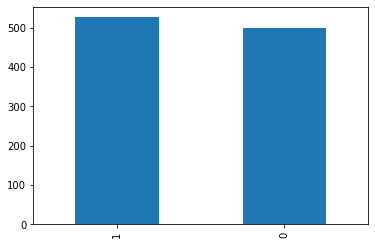

In [7]:
# visualize data
data["target"].value_counts().plot(kind="bar")

* Dữ liệu cân bằng

In [8]:
countNoDisease = len(data[data.target == 0])
countHaveDisease = len(data[data.target == 1])
print("Tỉ lệ bệnh nhân không mắc bệnh tim: {:.2f}%".format((countNoDisease / (len(data.target))*100)))
print("Tỉ lệ bệnh nhân mắc bệnh tim: {:.2f}%".format((countHaveDisease / (len(data.target))*100)))

Tỉ lệ bệnh nhân không mắc bệnh tim: 48.68%
Tỉ lệ bệnh nhân mắc bệnh tim: 51.32%


In [9]:
countFemale = len(data[data.sex == 0])
countMale = len(data[data.sex == 1])
print("Tỉ lệ bệnh nhân là nữ : {:.2f}%".format((countFemale / (len(data.sex))*100)))
print("Tỉ lệ bệnh nhân là nam : {:.2f}%".format((countMale / (len(data.sex))*100)))

Tỉ lệ bệnh nhân là nữ : 30.44%
Tỉ lệ bệnh nhân là nam : 69.56%


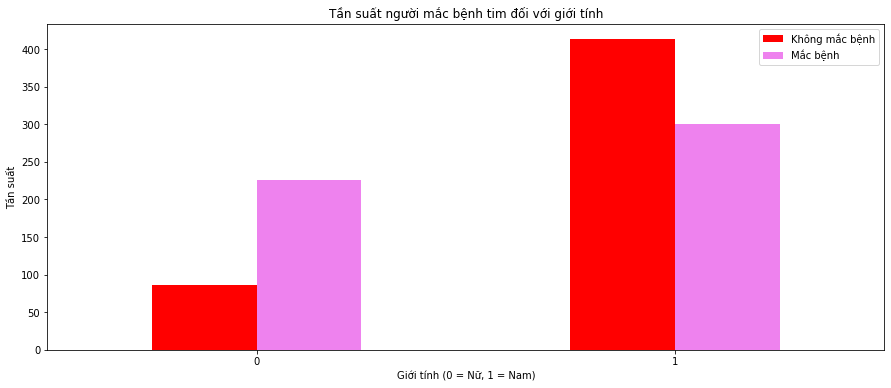

In [10]:
# visualize data
pd.crosstab(data.sex,data.target).plot(kind="bar",figsize=(15,6),color=['red','violet'])
plt.title('Tần suất người mắc bệnh tim đối với giới tính')
plt.xlabel('Giới tính (0 = Nữ, 1 = Nam)')
plt.xticks(rotation=0)
plt.legend(["Không mắc bệnh", "Mắc bệnh"])
plt.ylabel('Tần suất')
plt.show()

### Modelling

In [11]:
x = data.drop(['target'], axis = 1)
y = data.target.values
x.shape,y.shape

((1025, 13), (1025,))

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=42)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((820, 13), (820,), (205, 13), (205,))

In [13]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report

### RandomForest

In [14]:
RF = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
RF.fit(x_train, y_train)
y_pred = RF.predict(x_test)
# Tính accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
# Tính precision tp / (tp + fp)
precision = precision_score(y_test, y_pred, average='weighted')
print('Precision: %f' % precision)
# Tính recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred, average='weighted')
print('Recall: %f' % recall)
# Tính f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred, average='weighted')
print('F1 score: %f' % f1)
print(classification_report(y_test, y_pred))

Accuracy: 0.985366
Precision: 0.985784
Recall: 0.985366
F1 score: 0.985364
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



### SVM

In [15]:
SVM = SVC(random_state=42, class_weight='balanced')
SVM.fit(x_train, y_train)
y_pred = SVM.predict(x_test)

# Tính accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
# Tính precision tp / (tp + fp)
precision = precision_score(y_test, y_pred, average='weighted')
print('Precision: %f' % precision)
# Tính recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred, average='weighted')
print('Recall: %f' % recall)
# Tính f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred, average='weighted')
print('F1 score: %f' % f1)
print(classification_report(y_test, y_pred))

Accuracy: 0.663415
Precision: 0.663507
Recall: 0.663415
F1 score: 0.663318
              precision    recall  f1-score   support

           0       0.67      0.65      0.66       102
           1       0.66      0.68      0.67       103

    accuracy                           0.66       205
   macro avg       0.66      0.66      0.66       205
weighted avg       0.66      0.66      0.66       205



### LogisticRegression

In [16]:
LR1 = LogisticRegression(random_state=42, class_weight='balanced')
LR1.fit(x_train, y_train)
y_pred = LR1.predict(x_test)

# Tính accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
# Tính precision tp / (tp + fp)
precision = precision_score(y_test, y_pred, average='weighted')
print('Precision: %f' % precision)
# Tính recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred, average='weighted')
print('Recall: %f' % recall)
# Tính f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred, average='weighted')
print('F1 score: %f' % f1)
print(classification_report(y_test, y_pred))

Accuracy: 0.804878
Precision: 0.810549
Recall: 0.804878
F1 score: 0.803898
              precision    recall  f1-score   support

           0       0.85      0.74      0.79       102
           1       0.77      0.87      0.82       103

    accuracy                           0.80       205
   macro avg       0.81      0.80      0.80       205
weighted avg       0.81      0.80      0.80       205



C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### KNN

In [17]:
KNN = KNeighborsClassifier(n_neighbors = 2) 
KNN.fit(x_train, y_train)
y_pred = LR1.predict(x_test)
# Tính accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
# Tính precision tp / (tp + fp)
precision = precision_score(y_test, y_pred, average='weighted')
print('Precision: %f' % precision)
# Tính recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred, average='weighted')
print('Recall: %f' % recall)
# Tính f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred, average='weighted')
print('F1 score: %f' % f1)
print(classification_report(y_test, y_pred))

Accuracy: 0.804878
Precision: 0.810549
Recall: 0.804878
F1 score: 0.803898
              precision    recall  f1-score   support

           0       0.85      0.74      0.79       102
           1       0.77      0.87      0.82       103

    accuracy                           0.80       205
   macro avg       0.81      0.80      0.80       205
weighted avg       0.81      0.80      0.80       205

